# CSE 252A Computer Vision I Fall 2020 - Assignment 2

#### Instructor: David Kriegman

#### Assignment published on Sunday, November 1st, 2020

#### Due on: Thursday, November 12th, 2020 at 11:59pm Pacific Time

---

## Instructions

* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains theoretical and programming exercises.If you plan to submit hand written answers for theoretical exercises, please be sure your writing is readable and merge those in order with the final pdf you create out of this notebook. You could fill the answers within the notebook iteself by creating a markdown cell.
* Programming aspects of this assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you can do so. This has been provided just to provide you with a framework for the solution.
* You may use python packages for basic linear algebra (you can use numpy or scipy for basic operations), but you may not use packages that directly solve the problem.
* If you are unsure about using a specific package or function, then ask the instructor and teaching assistants for clarification.
* You must submit to Gradescope: 
    * (1) This notebook exported as a `.pdf` (including any hand-written solutions scanned and merged into the PDF, if applicable).
    * (2) This notebook as an `.ipynb` file. 
* You must mark each problem on Gradescope in the pdf.
* **Late policy:** Assignments submitted late will receive a 10% grade reduction for each day late (e.g. an assignment submitted an hour after the due date will receive a 10% penalty, an assignment submitted 10 hours after the due date will receive a 10% penalty, and an assignment submitted 28 hours after the due date will receive a 20% penalty). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only), you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.

## Problem 1: Steradians

### Part 1 [2 pts]

Calculate the number of steradians contained in a spherical wedge with radius _r_ = 1, defined by 
$\theta = \frac{\pi}{6}, \phi = \frac{\pi}{6}$ and centered around vector $\left(\frac{\sqrt{2}}{4}, \frac{\sqrt{2}}{4}, \frac{\sqrt{3}}{2}\right)$.

![spherical wedge](1_spherical_wedge.jpg)

### Answer: Problem 1 Part 1
By the definition of steradiance: 
<br> $\Omega = \frac{\Delta S}{r^2}$
<br> In this situation: we can calculate that the vector's angle should be $(\pi/4, \pi/4, \pi/3)$ among $(\alpha,\beta, \gamma)$ angle system.
<br> So the angle will be: $(30, 60)$ in $xy$ plane
<br> The angle will be: $(15, 45)$ in vertical of z-axis
<br> $dS = r^2 sin(\phi)d\phi d\theta$
<br> $S = \int_{\pi/6}^{\pi/3}\int_{\pi/12}^{\pi/4}r^2\cdot sin(\phi)d\phi d\theta = 0.1355$
<br> $\Omega = S/r^2 = 0.1355$

In [123]:
import numpy as np
pi = np.pi
print((pi/3 - pi/6) * (-np.cos(pi/4) + np.cos(pi/12)))

0.13551733511720074


### Part 2 [1 pt]

How many steradians are in a quarter sphere?

### Answer: Problem 1 Part 2
A complete sphere has 8 quarter spheres, so there will be $4\pi/8 = \pi/2$

## Problem 2: Irradiance [3 pts]

Consider a rectangular surface with vertices $(−4, −3, 1)$, $(4, −3, 1)$, $(−4, 3, 1)$, and $(4, 3, 1)$. If the radiance on the surface is equal in all directions and is given by $L \cdot (x^2 + y^2 + 3)$ (with L constant) what is the irradiance arriving at position $(0, 0, 0)$ with normal vector $(0, 0, 1)$? (Note: You do not need to perform the integration, just set up the integral.)

![Irradiance figure](irradiance_1.png)

### Answer: Problem 2
In this problem, I use the “radiance trasfer” model in lecture 5, $dA_1$ is emitting a radiance L and is lying on the rectangle. Assume there is a small area $dA_2$ lying on the $(0,0,0)$ and is receiving radiance. For a $dA_1$ lying on the coordination of $(x, y, 1)$ its radiance on $dA_2$ is
<br> $dP = Lcos(\theta_1)cos(\theta_2)dA_1dA_2/r^2$
<br> $dP = L\cdot (x^2 + y^2 + 3) dx dy dA_2/(x^2+y^2+1)^2$
So the total irradiance onto the original point $(0,0)$ should be:
<br> $P = \int dP = \int_{-4}^4\int_{-3}^3 \frac{(x^2+y^2+3)}{(x^2+y^2+1)^2}dxdy$

## Problem 3: Superposition of Light Sources and Lambertian Surfaces [2 pts]

A Lambertian surface is illuminated by two distant light sources. The first has intensity $s_1$ and direction $\hat{\bf{s_1}}$,and the second has intensity $s_2$ and direction $\hat{\bf{s_2}}$. Consider the surface to be shaped such that no part of it is in shadow from either individual light source. 

For every pixel in the image where the surface is illuminated by both sources, there is a single effective distant light source which will produce the same irradiance at that pixel. What is the intensity and direction of that light source?

### Answer: Problem 3
In this question, the word "distant" means that: we can treat the light source's radiance as parallel. And our surface is lambertian surface, which means that it is diffusion surface (only care about the irradiance but not the direection).So, it becomes easy that we will have that assume the direction of a single effective distant light source is $\hat{\bf{s_0}}$ and the intensity as $s_0$.
<br> we will have:
<br> $I_0 = I_1 + I_2$
<br> $a \hat{\bf{n}} \cdot s_0\hat{\bf{s_0}} = a \hat{\bf{n}} \cdot s_1\hat{\bf{s_1}} + a \hat{\bf{n}} \cdot s_2\hat{\bf{s_2}}$
<br> Finally, we will have a single light source satisfied the following condition:
<br> $ \hat{\bf{n}} \cdot s_0\hat{\bf{s_0}} = \hat{\bf{n}} \cdot s_1\hat{\bf{s_1}} + \hat{\bf{n}} \cdot s_2\hat{\bf{s_2}}$
<br> where $\hat{\bf{n}}$ is our surface's normal vector.

## Problem 4: Occlusion, Umbra and Penumbra [2 pts]

We have a square area source and a square occluder, both parallel to a plane. 

The edge lengths of the source and occluder are 2 and 4, respectively, and they are vertically above one another with their centers aligned. The distances from the occluder to the source and plane are both 3.

1. What is the area of the umbra on the plane?

2. What is the area of the penumbra on the plane?

### Answer Problem 4:
As we can see from the image:
![occlusion](hw2_img1.png)

<br> The x and y have the following geometry relationship:
<br> $x = 3$
<br> $(y + 1) : 3 = 2 : 1 \Rightarrow y = 5$

<br> So we can knoww that the area of umbra is: $x^2 = 9$
<br> The area of penumbra is: $y^2 - x^2 = 25-9 = 16$


## Problem 5: Photometric Stereo [6 pts]

The goal of this problem is to implement a couple of different algorithms that reconstruct a surface using the concept of photometric stereo.

Your program will take in multiple images as input along with the light source direction (and color when necessary) for each image.

### Data
Synthetic Images: Available in `*.pickle` files (graciously provided by Satya Mallick) which contain

* `im1`, `im2`, `im3`, `im4`... images.

* `l1`, `l2`, `l3`, `l4`... light source directions.

Implement the photometric stereo technique described in Forsyth and Ponce 2.2.4 (*Photometric Stereo: Shape from Multiple Shaded Images*) and the lecture notes. 

Your program should have two parts:

1. Read in the images and corresponding light source directions, and estimate the surface normals and albedo map.

1. Reconstruct the depth map from the surface normals. You can first try the naive scanline-based shape by integration method described in the book.  If this does not work well on real images, you can use the implementation of the Horn integration technique given below in `horn_integrate` function.

Try using only `im1`, `im2` and `im4` first. Display your outputs as mentioned below.

Then use all four images. (Most accurate).

For each of the above cases you must output:

1. The estimated albedo map.

2. The estimated surface normals by showing both
    1. Needle map, and
    2. Three images showing components of surface normal.

3. A wireframe of depth map.

4. Horn output

An example of outputs is shown below.

![Photometric example](photometric_example.png)

Note: You will find all the data for this part in `synthetic_data.pickle`.

Keys: dict_keys(['__version__', 'l4', '__header__', 'im1', 'im3', 'im2', 'l2', 'im4', 'l1', '__globals__', 'l3'])
Image:


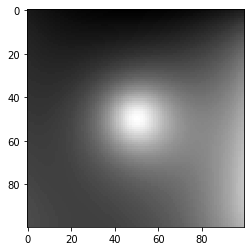

Light source direction: [[0 0 1]]
Light source direction: [[0.2 0.  1. ]]
Light source direction: [[0.  0.2 1. ]]


In [124]:
## Example: How to read and access data from a pickle
import pickle
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

pickle_in = open('synthetic_data.pickle', 'rb')
data = pickle.load(pickle_in, encoding='latin1')

# data is a dict which stores each element as a key-value pair. 
print('Keys: ' + str(data.keys()))

# To access the value of an entity, refer it by its key.
print('Image:')
plt.imshow(data['im1'], cmap = 'gray')
plt.show()

print('Light source direction: ' + str(data['l1']))
print('Light source direction: ' + str(data['l2']))
print('Light source direction: ' + str(data['l4']))

In [201]:
from scipy.signal import convolve
from numpy import linalg

def horn_integrate(gx, gy, mask, niter=25000):
    """ 
        horn_integrate recovers the function g from its partial derivatives gx and gy. 
        mask is a binary image which tells which pixels are involved in integration. 
        niter is the number of iterations (typically 100,000 or 200,000, 
        although the trend can be seen even after 1000 iterations).
    """    
    g = np.ones(np.shape(gx))
    
    gx = np.multiply(gx, mask)
    gy = np.multiply(gy, mask)
    
    A = np.array([[0,1,0],[0,0,0],[0,0,0]]) #y-1
    B = np.array([[0,0,0],[1,0,0],[0,0,0]]) #x-1
    C = np.array([[0,0,0],[0,0,1],[0,0,0]]) #x+1
    D = np.array([[0,0,0],[0,0,0],[0,1,0]]) #y+1
    
    d_mask = A + B + C + D
    
    den = np.multiply(convolve(mask, d_mask, mode='same'), mask)
    den[den == 0] = 1
    rden = 1.0 / den
    mask2 = np.multiply(rden, mask)
    
    m_a = convolve(mask, A, mode='same')
    m_b = convolve(mask, B, mode='same')
    m_c = convolve(mask, C, mode='same')
    m_d = convolve(mask, D, mode='same')
    
    term_right = np.multiply(m_c, gx) + np.multiply(m_d, gy)
    t_a = -1.0 * convolve(gx, B, mode='same')
    t_b = -1.0 * convolve(gy, A, mode='same')
    term_right = term_right + t_a + t_b
    term_right = np.multiply(mask2, term_right)
    
    for k in range(niter):
        g = np.multiply(mask2, convolve(g, d_mask, mode='same')) + term_right
    
    return g

In [202]:
def photometric_stereo(images, lights, mask, horn_niter=25000):

    # images: radiosity
    # lights: lights direction
    """ ==========YOUR CODE HERE========== """
    # note:
    # images : (n_ims, h, w) 
    # lights : (n_ims, 3)
    
    albedo = np.ones(images[0].shape) # (h, w)
    normals = np.dstack((np.zeros(images[0].shape),
                         np.zeros(images[0].shape),
                         np.ones(images[0].shape)))
    H = np.ones(images[0].shape)
    H_horn = np.ones(images[0].shape)
    
    
    n_ims = images.shape[0] # n_ims
    h = images.shape[1] # h
    w = images.shape[2] # w
    
    b = np.zeros((h, w, 3))

    # Compute albedo and normals
    for h_ in range(h):
        for w_ in range(w):
            b[h_, w_, :] = np.linalg.inv(lights) @ images[:, h_, w_]
            albedo[h_, w_] = np.linalg.norm(b[h_, w_, :])
            normals[h_, w_, :] = b[h_, w_, :]/albedo[h_, w_]

    # Integrate of the hight
    H = np.ones(images[0].shape)
    sum = 0
    for i in range(0, h):
        if mask[i, 0] != 0:
            x, y, z = normals[i, 0, :]
            q = y / z
            sum += q
            H[i, 0] = sum
    
    # Integrate of image all
    for i in range(0, h):
        sum = H[i, 0]
        for j in range(1, w):
            if mask[i, j] != 0:
                x, y, z = normals[i, j, :]
                p = x / z
                q = y / z
                sum += p
                H[i, j] = sum
    
    # Horns integrate
    H_horn = np.ones(images[0].shape)
    gx = np.zeros(images[0].shape)
    gy = np.zeros(images[0].shape)
    for i in range(0, h):
        for j in range(1, w):
            if mask[i, j] != 0:
                x, y, z = normals[i, j, :]
                gx[i, j] = x / z 
                gy[i, j] = y / z
    H_horn = horn_integrate(gx, gy, mask, horn_niter)
    
    return albedo, normals, H, H_horn


horn_niter =  25000


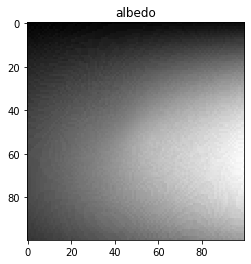

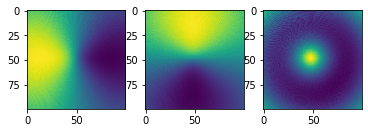

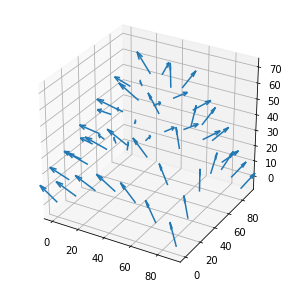

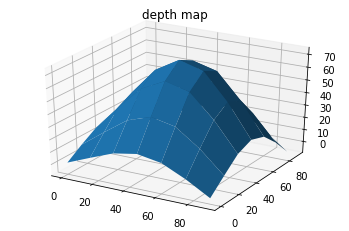

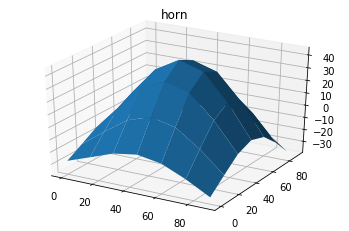

In [228]:
from mpl_toolkits.mplot3d import Axes3D
import math
pickle_in = open('synthetic_data.pickle', 'rb')
data = pickle.load(pickle_in, encoding='latin1')

lights = np.vstack((data['l1'], data['l2'], data['l4']))
images = []
images.append(data['im1'])
images.append(data['im2'])
# images.append(data['im3'])
images.append(data['im4'])
images = np.array(images)

mask = np.ones(data['im1'].shape)


albedo, normals, depth, horn = photometric_stereo(images, lights, mask, horn_niter=25000)

# --------------------------------------------------------------------------
# The following code is just a working example so you don't get stuck with any
# of the graphs required. You may want to write your own code to align the
# results in a better layout.
# --------------------------------------------------------------------------

def visualize(albedo, normals, depth, horn):

    # Stride in the plot, you may want to adjust it to different images
    stride = 15

    # showing albedo map
    fig = plt.figure()
    albedo_max = albedo.max()
    albedo = albedo / albedo_max
    plt.title('albedo')
    plt.imshow(albedo, cmap='gray')
    plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # showing normals as quiver
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], 15),
                          np.arange(0,np.shape(normals)[1], 15),
                          np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]
    Z = depth[::stride,::stride].T
    NX = normals[..., 0][::stride,::-stride].T
    NY = normals[..., 1][::-stride,::stride].T
    NZ = normals[..., 2][::stride,::stride].T
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    plt.quiver(X,Y,Z,NX,NY,NZ, length=stride)
    plt.show()

    # plotting wireframe depth map
    H = depth[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.title('depth map')
    ax.plot_surface(X,Y, H.T)
    plt.show()

    # plot horn output 
    H = horn[::stride,::stride]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.title('horn')
    ax.plot_surface(X,Y, H.T)
    plt.show()
    
visualize(albedo, normals, depth, horn)

## Problem 6: Image Filtering [13 pts]

### Part 1: Warmup [1.5 pts]

In this problem, we expect you to use convolution to filter the provided image with three different types of kernels:
1. A 5x5 Gaussian filter with σ = 5. 
2. A 31x31 Gaussian filter with σ = 5. 
3. A sharpening filter.

This is the image you will be using:

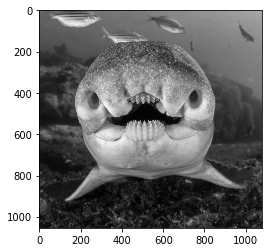

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Open image as grayscale
shark_img = io.imread('shark.png', as_gray=True)

# Show image
plt.imshow(shark_img, cmap=cm.gray)
plt.show()

For convenience, we have provided a helper function for creating a square isotropic Gaussian kernel. We have also provided the sharpening kernel that you should use. Finally, we have provided a function to help you plot the original and filtered results side-by-side. Take a look at each of these before you move on.

In [2]:
def gaussian2d(filter_size=5, sig=1.0): 
    """Creates a 2D Gaussian kernel with side length ‘filter_size‘ and a sigma of ‘sig‘."""
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

sharpening_kernel = np.array([[1, 4,     6,  4, 1],
                              [4, 16,   24, 16, 4],
                              [6, 24, -476, 24, 6],
                              [4, 16,   24, 16, 4],
                              [1,  4,    6,  4, 1],
                            ]) * -1.0 / 256.0

def plot_results(original, filtered):
    # Plot original image
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.imshow(original, vmin=0.0, vmax=1.0)
    plt.title('Original')
    plt.axis('off')
    
    # Plot filtered image
    plt.subplot(2,2,2)
    plt.imshow(filtered, vmin=0.0, vmax=1.0)
    plt.title('Filtered')
    plt.axis('off')
    plt.show()

Now fill in the functions below and display outputs for each of the filtering results. There should be three
sets of (original, filtered) outputs in total. You are allowed to use the imported convolve function.

5x5 Gaussian filter, sigma=5


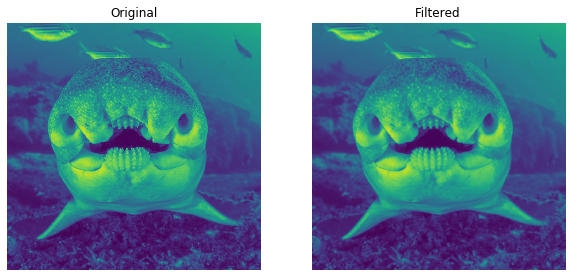

31x31 Gaussian filter, sigma=5


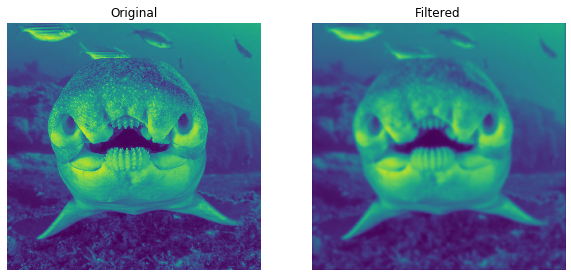

sharpening filter


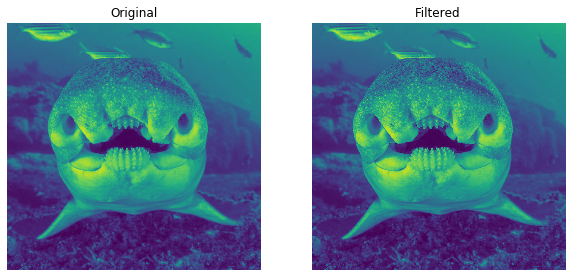

In [3]:
from scipy.signal import convolve
import numpy as np
def filter1(img):
    """Convolve the image with a 5x5 Gaussian filter with sigma=5.""" 
    
    """ ==========YOUR CODE HERE========== """
    kernel = gaussian2d(5,5)
    return convolve(img, kernel, 'same', 'auto')

def filter2(img):
    """Convolve the image with a 31x31 Gaussian filter with sigma=5.""" 
    
    """ ==========YOUR CODE HERE========== """
    kernel = gaussian2d(31,5)
    return convolve(img, kernel, 'same', 'auto')

def filter3(img):
    """Convolve the image with the provided sharpening filter.""" 
    
    """ ==========YOUR CODE HERE========== """
    sharpening_kernel = np.array([[1, 4,     6,  4, 1],
                              [4, 16,   24, 16, 4],
                              [6, 24, -476, 24, 6],
                              [4, 16,   24, 16, 4],
                              [1,  4,    6,  4, 1],
                            ]) * -1.0 / 256.0
    return convolve(img, sharpening_kernel, 'same', 'auto')

for filter_name, filter_fn in [
    ('5x5 Gaussian filter, sigma=5', filter1),
    ('31x31 Gaussian filter, sigma=5', filter2),
    ('sharpening filter', filter3),
]:
    filtered = filter_fn(shark_img)
    print(filter_name)
    plot_results(shark_img, filtered)

### Part 2.1 [1 pt]

Display the Fourier log-magnitude transform image for the (original image, 31x31 Gaussian-filtered image) pair. (No need to include the others.) We have provided the code to compute the Fourier log-magnitude image.

31x31 Gaussian filter, sigma=5


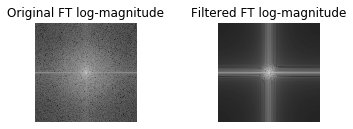

In [4]:
# Visualize the frequency domain images 
def plot_ft_results(img1, img2):
    plt.subplot(2,2,1)
    plt.imshow(img1, cmap='gray')
    plt.title('Original FT log-magnitude')
    plt.axis('off')
    plt.subplot(2,2,2)
    plt.imshow(img2, cmap='gray')
    plt.title('Filtered FT log-magnitude')
    plt.axis('off')
    plt.show()
        
def ft_log_magnitude(img_gray):
    return np.log(np.abs(np.fft.fftshift(np.fft.fft2(img_gray))))

print('31x31 Gaussian filter, sigma=5')
plot_ft_results(ft_log_magnitude(shark_img), ft_log_magnitude(filter2(shark_img)))

### Part 2.2 [1 pt]

Explain the differences you see between the original frequency domain image and the 31x31 Gaussian-filtered frequency domain image. In particular, be sure to address the following points: - Why is most of the frequency visualization dark after applying the Gaussian filter, and what does this signify? - What is an example of one of these dark regions in the spatial domain (original image)? - What do the remaining bright regions in the magnitude image represent? - What is an example of one of these bright regions in the spatial domain (original image)?

=== Write your answer here ===

### Anser: Part2.2
1. Why is most of the frequency visualization dark after applying the Gaussian filter, and what does this signify?
<br> The Gaussian filter is a low-pass filter. After applying Gaussian filter, it will narrow the range of frequencies it passes, thus eliminate the noise and signify the relative stronger main signal, therefore most of the frequency visualization gets dark. However, the original image will be more blurry.
2. What is an example of one of these dark regions in the spatial domain (original image)
<br> The small magnitute for higher frequencies such as small and fierce turbulance (is suppressed after Gaussian filter), such as the fuzzy edge of the dog's fur.
3. What do the remaining bright regions in the magnitude image represent?
<br> Lower frequencies contain more image information.
4. What is an example of one of these bright regions in the spatial domain (original image)?
<br> Animal eyes.

### Part 3 [3 pts]

Consider (1) smoothing an image with a 3x3 box filter and then computing the derivative in the y-direction (use the derivative filter from Lecture 7). Also consider (2) computing the derivative first, then smoothing. What is a single convolution kernel that will simultaneously implement both (1) and (2)?

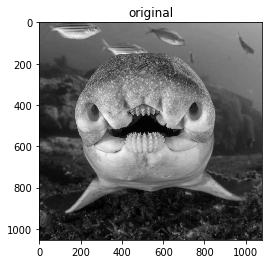

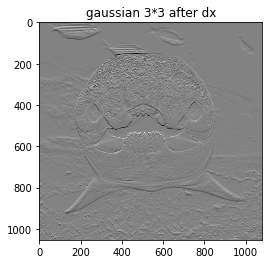

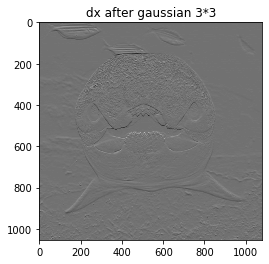

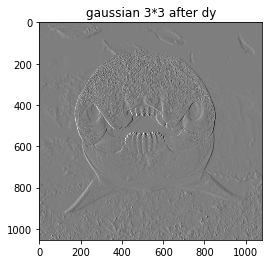

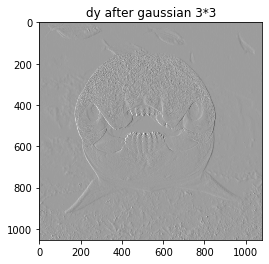

In [5]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import convolve

# Open image as grayscale
shark_img = io.imread('shark.png', as_gray=True)

# Show image
plt.title('original')
plt.imshow(shark_img, cmap=cm.gray)
plt.show()

sobel_x = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])
sobel_y = sobel_x.T

"""
dx = convolve(shark_img, sobel_x, 'same', 'auto')
dy = convolve(shark_img, sobel_y, 'same', 'auto')
plt.title('x derivative')
plt.imshow(dx, cmap=cm.gray)
plt.show()
plt.title('y derivative')
plt.imshow(dy, cmap=cm.gray)
plt.show()
"""
gaussian3 = gaussian2d(3,1)

gaus_blur_dx = convolve(convolve(shark_img, sobel_x, 'same', 'auto')
                        , gaussian3, 'same', 'auto')
plt.title('gaussian 3*3 after dx')
plt.imshow(gaus_blur_dx, cmap=cm.gray)
plt.show()

dx_gaus_blur = convolve(convolve(shark_img, gaussian3, 'same', 'auto')
                        , sobel_x, 'same', 'auto')
plt.title('dx after gaussian 3*3')
plt.imshow(dx_gaus_blur, cmap=cm.gray)
plt.show()

gaus_blur_dy = convolve(convolve(shark_img, sobel_y, 'same', 'auto')
                        , gaussian3, 'same', 'auto')
plt.title('gaussian 3*3 after dy')
plt.imshow(gaus_blur_dy, cmap=cm.gray)
plt.show()

dy_gaus_blur = convolve(convolve(shark_img, gaussian3, 'same', 'auto')
                        , sobel_y, 'same', 'auto')
plt.title('dy after gaussian 3*3')
plt.imshow(dy_gaus_blur, cmap=cm.gray)
plt.show()





=== Write your answer here ===
### Answer: Part 3
As we can see from the above results, because of the continuous convolution is communative and associative, there will be no differece whenever convolving different kernels in differnet sequence. So, assume we have a $3\cdot 3$ box kernel $K_1$ and a derivative kernel $K_2$. The wanted kernel can be $K_1 * K_2$ or $K_2 * K_1$ with appropriate padding.

### Part 4 [3 pts]

Give an example of a 3x3 separable filter and compare the number of arithmetic operations it takes to convolve using that filter on an n × n image before and after separation.

=== Write your answer here ===

### Part 4
1. Given an example of 3x3 separable filter

A two-dimensional 3x3 filter can be (like sobel operator):
<br>
$\begin{bmatrix}
1 \\
2 \\
1 \\
\end{bmatrix} *
\begin{bmatrix}
1 & 0 & -1
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & 1\\
2 & 0 & -2\\
1 & 0 & -1\\
\end{bmatrix} 
$

2. compare the number of arithmetic operations it takes to convolve using that filter on an n × n image before and after separation

    a. if we apply two kernels onto the nxn image, we will have 2 times ($3n^2$ multiplication and $2n^2$ addition), which is $6n^2$ multiplication and $4n^2$ addition.
    
    b. Before we apply seperation, we will have $9n^2$ multiplication and $8n^2$ addition.

### Part 5: Filters as Templates [3.5 pts]

Suppose that you are a traveling ornithologist. You are trying to find a rare bird specimen in a museum collection. Because the museum curators are highly disorganized, you decide to build a computer vision system for finding specific birds in the museum's extensive collection.

Luckily, you have learned in CSE 252A (or are learning right now) that convolution can be used for template matching: a template $g$ is multiplied with regions of a larger image $f$ to measure how similar each region is to the template. Note that you will want to flip the filter before giving it to your convolution function, so that it is overall not flipped when making comparisons. You will also want to subtract off the mean value of the image or template (whichever you choose, subtract the same value from both the image and template) so that your solution is not biased toward higher-intensity (white) regions.

The template of a bird (template.jpg) and the image of the collection (bird_collection.jpg) is provided. We will use convolution to find the correct bird in the collection.

(133, 76)
(714, 1000)


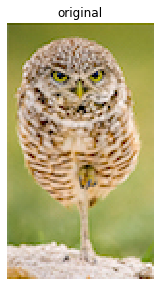

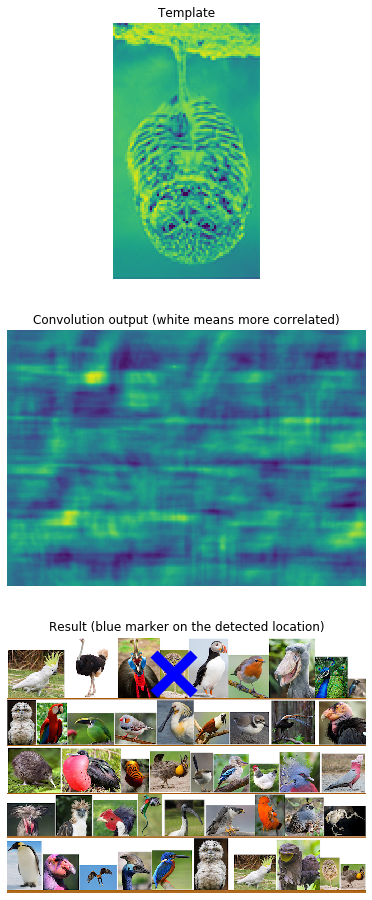

In [20]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy.signal import convolve
%matplotlib inline

# Load template and image in grayscale
bird_img = io.imread('bird_collection.jpg')
img_gray = io.imread('bird_collection.jpg', as_gray=True)
temp_img = io.imread('template.jpg')
temp_gray = io.imread('template.jpg', as_gray=True)

# Perform a convolution between the image and the template
""" ========== YOUR CODE HERE ========== """

out = np.zeros_like(temp_gray)
temp_gray = np.flipud(np.fliplr(temp_gray))
mean = temp_gray.mean()
temp_gray = temp_gray - mean
img_gray = img_gray - mean
print(temp_gray.shape)
print(img_gray.shape)
out = convolve(img_gray, temp_gray, 'same', 'auto')

        
# Find the location with maximum similarity
y, x = (np.unravel_index(out.argmax(), out.shape))

# Display bird template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_img)
plt.title('original')
plt.axis('off')

# Display bird template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_gray)
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(bird_img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()